In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [105]:
msft = yf.Ticker('MSFT')
vix = yf.Ticker('^VIX')

hist = msft.history(period='20y', interval="1wk").drop(['Stock Splits', 'Dividends'], axis=1)
hist['Volatility'] = vix.history(period='20y', interval="1wk").Open.values
# hist['Volatility'] = list(vix.history(period='20y', interval='1d').Open)
returns = hist.Open - hist.Close
hist.drop(hist.index[0], inplace=True)
returns.drop(returns.index[-1], inplace=True)
hist['Returns'] = list(returns)
hist.tail()

# x_scaled = min_max_scaler.fit_transform(hist.drop['Volatility'])


,Open,High,Low,Close,Volume,Volatility,Returns
Date,,,,,,,
2024-07-01 00:00:00-04:00,448.660004,468.350006,445.660004,467.559998,57575700,12.980000,2.849976
2024-07-08 00:00:00-04:00,466.549988,467.700012,450.649994,453.549988,87801100,12.910000,-18.899994
2024-07-15 00:00:00-04:00,453.299988,457.260010,432.000000,437.109985,95118300,12.780000,13.000000
2024-07-22 00:00:00-04:00,441.790009,448.390015,417.269989,425.269989,109249300,16.790001,16.190002
2024-07-29 00:00:00-04:00,431.579987,432.149994,417.359985,422.920013,73699934,16.590000,16.520020


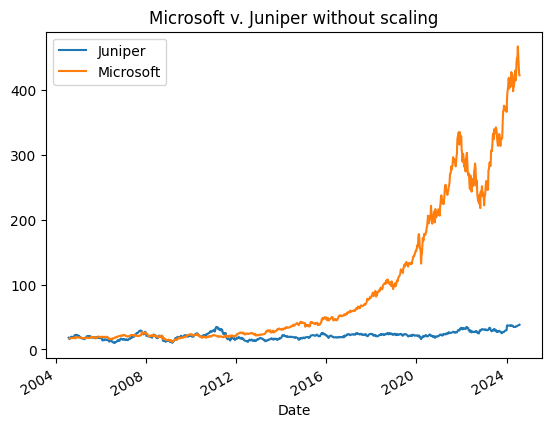

In [106]:
aapl = yf.Ticker('JNPR')
hist_a = aapl.history(period='20y', interval="1wk").drop(['Stock Splits', 'Dividends'], axis=1)
hist_a.drop(hist.index[0], inplace=True)
hist_a['Microsoft Close'] =  hist.Close
hist_a.rename(columns={"Close": "Juniper", "Microsoft Close": "Microsoft"}, inplace=True)
hist_a[['Juniper', 'Microsoft']].plot()
plt.title("Microsoft v. Juniper without scaling")
plt.xlabel("Date")
plt.show()


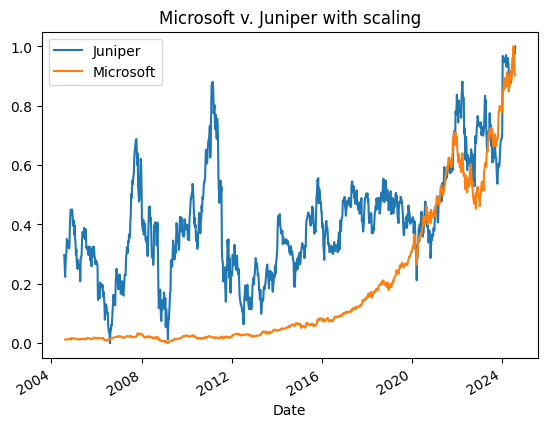

In [21]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(hist_a[['Juniper', 'Microsoft']])
p = pd.DataFrame(x_scaled)
p.rename(columns={0: "Juniper", 1: "Microsoft"}, inplace=True)
p.set_index(hist_a.index, inplace=True)
p.plot()
plt.title("Microsoft v. Juniper with scaling")
plt.xlabel("Date")
plt.show()

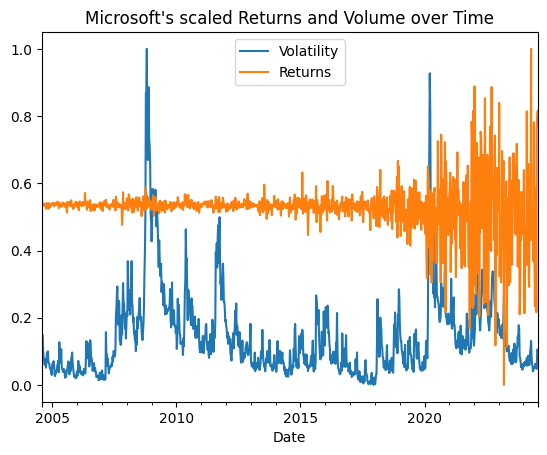

In [22]:
from sklearn import preprocessing
import pandas as pd

hist[['Volatility', 'Returns']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(hist[['Volatility', 'Returns']])
p = pd.DataFrame(x_scaled)
p.set_index(hist.index, inplace=True)
p.rename(columns={0: "Volatility", 1: "Returns"}, inplace=True)
p.plot()
plt.title("Microsoft's scaled Returns and Volume over Time")
plt.xlabel("Date")
plt.show()

In [23]:
index = hist.index
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(hist)
p = pd.DataFrame(x_scaled)
p.rename(columns={0: "Open", 1: "High", 2:"Low", 3:"Close", 4:"Volume", 5:"Volatility", 6:"Returns"}, inplace=True)
p.set_index(index, inplace=True)
p.tail()

,Open,High,Low,Close,Volume,Volatility,Returns
Date,,,,,,,
2024-07-01 00:00:00-04:00,0.960703,1.000000,0.988649,1.000000,0.004474,0.050524,0.584385
2024-07-08 00:00:00-04:00,1.000000,0.998575,1.000000,0.969290,0.041073,0.049519,0.216630
2024-07-15 00:00:00-04:00,0.970895,0.975688,0.957575,0.933253,0.049934,0.047653,0.756004
2024-07-22 00:00:00-04:00,0.945612,0.956243,0.924066,0.907299,0.067045,0.105210,0.809942
2024-07-29 00:00:00-04:00,0.923185,0.920641,0.924271,0.902148,0.023999,0.102340,0.815522


In [15]:
import plotly.express as px

px.scatter(hist, x='Close', y='Returns', trendline='ols', trendline_color_override='red', width=1200)

In [12]:
px.scatter(hist, x='Volume', y='Returns', trendline='ols', trendline_color_override='red', width=1200)

In [14]:
px.scatter(hist, x='Volatility', y='Returns', trendline='ols', trendline_color_override='red', width=1200)

### Dividing train and test data from ARIMA

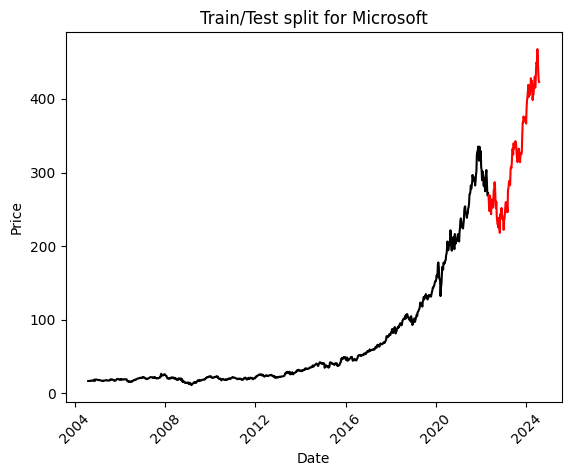

In [107]:
hist.index = pd.to_datetime(hist.index, format='%Y-%m-%d')
train = hist[hist.index < pd.to_datetime("2022-05-01 00:00:00-04:00")]
test = hist[hist.index > pd.to_datetime("2022-05-01 00:00:00-04:00")]


plt.plot(train.Close, color = "black")
plt.plot(test.Close, color = "red")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Microsoft")
plt.show()

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           53     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26185D+00    |proj g|=  1.22868D+00


 This problem is unconstrained.



At iterate    5    f=  2.55332D+00    |proj g|=  5.18684D-02

At iterate   10    f=  2.52742D+00    |proj g|=  2.81676D-02

At iterate   15    f=  2.52416D+00    |proj g|=  2.99026D-03

At iterate   20    f=  2.52333D+00    |proj g|=  5.59908D-03

At iterate   25    f=  2.52273D+00    |proj g|=  1.03190D-02

At iterate   30    f=  2.52207D+00    |proj g|=  5.71139D-03

At iterate   35    f=  2.52053D+00    |proj g|=  6.25262D-03

At iterate   40    f=  2.51990D+00    |proj g|=  4.43373D-03

At iterate   45    f=  2.51953D+00    |proj g|=  4.42588D-03


/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  2.51918D+00    |proj g|=  2.92599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   53     50     57      1     0     0   2.926D-03   2.519D+00
  F =   2.5191761669874477     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/asolergayoso/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting 

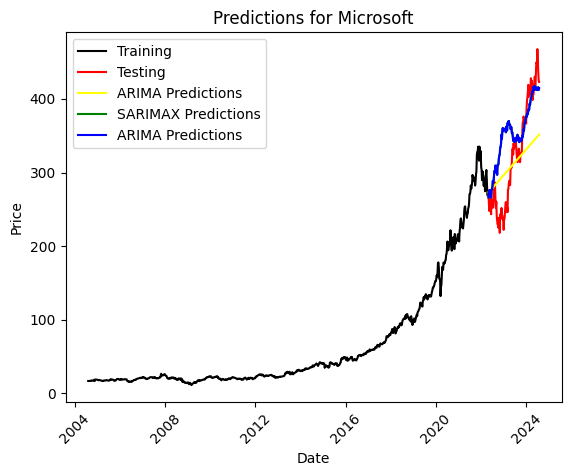

In [157]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

ARIMAmodel = ARIMA(train.Close, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

plt.plot(train.Close, color = "black", label="Training")
plt.plot(test.Close, color = "red", label="Testing")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Microsoft")

y_pred = ARIMAmodel.get_forecast(len(test.Close.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')


ARIMAmodel = SARIMAX(train.Close, order = (50, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.Close.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Green', label = 'SARIMAX Predictions')
plt.legend()


ARIMAmodel = ARIMA(train.Close, order = (50, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.Close.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'ARIMA Predictions')
plt.legend()

In [219]:
from statsmodels.tsa.api import VAR
import numpy as np
VARModel = VAR(train[["Close", "Volume"]].diff().dropna().values)
results = VARModel.fit(maxlags=15, ic='aic')

pred = results.forecast(train[["Close", "Volume"]].values, len(test.index))

# test[["Close", "Volume"]].iloc[0].values
# pred = np.insert(pred, 0, train[["Close", "Volume"]].iloc[-1].values, axis=0)
df_forecast=pd.DataFrame(data=pred, index=test.index, columns=["Close", "Volume"])
df_forecast = pd.concat([train[["Close", "Volume"]][-1:], df_forecast]).sort_index()
# str(df_forecast.index[0])
df_forecast.cumsum().drop(pd.Timestamp(df_forecast.index[0]))

# df_forecast['Money1d'] = (df['Money'].iloc[-test_obs-1]-df['Money'].iloc[-test_obs-2]) + df_forecast['money2d'].cumsum()
# df_forecast['MoneyForecast'] = df['Money'].iloc[-test_obs-1] + df_forecast['Money1d'].cumsum()

,Close,Volume
Date,,
2022-05-02 00:00:00-04:00,281.781190,7.480008e+08
2022-05-09 00:00:00-04:00,310.690188,1.355757e+09
2022-05-16 00:00:00-04:00,353.184346,1.940007e+09
2022-05-23 00:00:00-04:00,375.698110,2.494333e+09
2022-05-30 00:00:00-04:00,434.833264,2.892175e+09
...,...,...
2024-07-01 00:00:00-04:00,882.441952,4.271090e+09
2024-07-08 00:00:00-04:00,882.723497,4.270847e+09
2024-07-15 00:00:00-04:00,883.007666,4.270745e+09


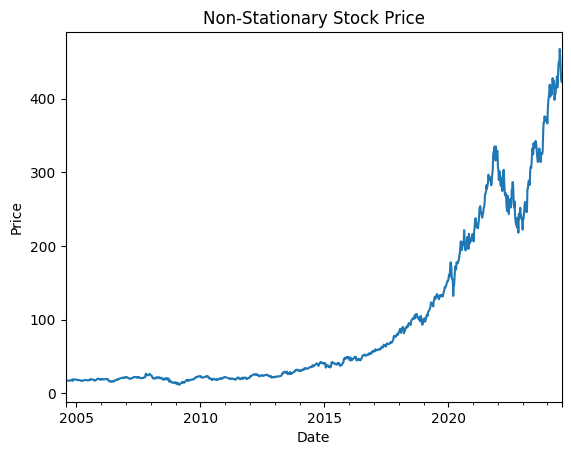

In [155]:
hist.Close.plot()
plt.title("Non-Stationary Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

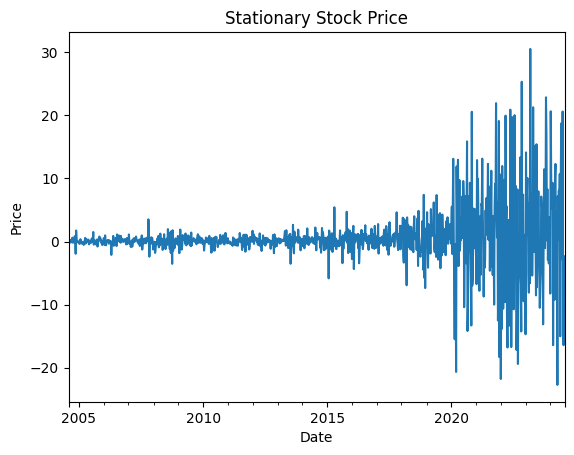

In [156]:
hist.Close.diff().plot()
plt.title("Stationary Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [220]:
hist.index.to_period("W")

/var/folders/ld/jdt2rrwn3gd75phll07jks3w0000gn/T/ipykernel_64787/2771703777.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



PeriodIndex(['2004-08-02/2004-08-08', '2004-08-09/2004-08-15',
             '2004-08-16/2004-08-22', '2004-08-23/2004-08-29',
             '2004-08-30/2004-09-05', '2004-09-06/2004-09-12',
             '2004-09-13/2004-09-19', '2004-09-20/2004-09-26',
             '2004-09-27/2004-10-03', '2004-10-04/2004-10-10',
             ...
             '2024-05-27/2024-06-02', '2024-06-03/2024-06-09',
             '2024-06-10/2024-06-16', '2024-06-17/2024-06-23',
             '2024-06-24/2024-06-30', '2024-07-01/2024-07-07',
             '2024-07-08/2024-07-14', '2024-07-15/2024-07-21',
             '2024-07-22/2024-07-28', '2024-07-29/2024-08-04'],
            dtype='period[W-SUN]', name='Date', length=1044)